In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


#print(merged_df['blast_percentage_(%)'])
#merged_df['disease_burden'].value_counts()

In [2]:
df = pd.read_csv("20250810_merged_data.csv")

print(df.columns)
df['disease_burden'] = 'Low'
print(df['disease_burden'].value_counts())
df.loc[df['bulky-_non-_bulky'] == 'Bulky', 'disease_burden'] = 'High'
df.loc[df['blast_percentage_(%)'] > 5, 'disease_burden'] = 'High'
print(df['disease_burden'].value_counts())

Index(['Unnamed: 0', 'immunoact_patient_id', 'indication', 'age',
       'lines_of_tx_(<3_or_≥3)', 'no_of_prior_lines_of_tx', 'blast_%',
       'blast_percentage_(%)', 'bulky-_non-_bulky', 'apheresis_(yes-no)',
       'infused_(yes-no)', 'best_orr', 'mrd_negative_(yes/no)',
       'active_cns_disease_at_baseline',
       'extramedullary_disease_(yes/no)_(pet/ct)',
       'mrd_negative_at_baseline_(yes/no)',
       'active_cns_disease_prior_to_infusion_(yes/no)',
       'mrd_negative_prior_infusion_(yes/no)', 'response_at__d-28(cr-pr-pd)',
       'response_at_m-3(cr-pr-pd)', 'response_at_m-6(cr-pr-pd)', 'crp_upd',
       'ldh_upd', 'patient_id', 'batch_id', 'mfg_attempt', 'mfg_outcomes',
       'body_weight', 'released_(y/n)', 'lsm_cd3+_t_cell', 'lsm_cd4+_t_cell',
       'lsm_cd8+t_cells', 'lsm_cd3_t_naïve/tscm', 'lsm_cd3_tcm', 'lsm_cd3_tem',
       'lsm_cd3_temra', 'lsm_cd4_t_naïve/tscm', 'lsm_cdd4_tcm', 'lsm_cd4_tem',
       'lsm_cd4_temra', 'lsm_cd8_t_naïve/tscm', 'lsm_cd8_tcm', 'lsm

In [3]:


sel_col = ['age','no_of_prior_lines_of_tx','active_cns_disease_at_baseline','extramedullary_disease_(yes/no)_(pet/ct)',
           'crp_upd','ldh_upd',
          'mfg_attempt','lsm_cd3+_t_cell', 'lsm_cd4+_t_cell',
       'lsm_cd8+t_cells', 'lsm_cd3_t_naïve/tscm', 'lsm_cd3_tcm', 'lsm_cd3_tem',
       'lsm_cd3_temra', 'lsm_cd4_t_naïve/tscm', 'lsm_cdd4_tcm', 'lsm_cd4_tem',
       'lsm_cd4_temra', 'lsm_cd8_t_naïve/tscm', 'lsm_cd8_tcm', 'lsm_cd8_tem',
       'lsm_cd8_temra', 'cd4_cd8_ratio', 'cd3_n_cd3_tcm', 'cd3_n_+cd3_tcm',
       'disease_burden']
# Create dataset

X = df[sel_col]
y = df['class_cat_m3']

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

print(cat_cols)
#print(X.head())

# Scale numerical columns
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_cols)

# --- One-Hot Encode categorical features ---
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
X_cat_encoded = encoder.fit_transform(X[cat_cols])

# Get new column names after encoding
encoded_cat_cols = encoder.get_feature_names_out()

# Combine numerical + encoded categorical features
X_num = X[num_cols].reset_index(drop=True)
X_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_cols)
X_final = pd.concat([X_num_scaled_df, X_encoded], axis=1)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train Random Forest
#rf = RandomForestClassifier(random_state=42)
#rf = RandomForestClassifier(random_state=42)
#rf.fit(X_final, y)

# --- Feature Importance ---
#feature_importance_df = pd.DataFrame({
   # 'Feature': X_final.columns,
   # 'Importance': rf.feature_importances_
#}).sort_values(by='Importance', ascending=False)

#X_final['age'].std()
#print(feature_importance_df.sort_values(by='Importance', ascending=False))

Index(['active_cns_disease_at_baseline',
       'extramedullary_disease_(yes/no)_(pet/ct)', 'disease_burden'],
      dtype='object')


In [4]:

# Create train/test datasets

X = df[sel_col]
y = df['class_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

print(cat_cols)
#print(X.head())

# Scale numerical columns
scaler = StandardScaler()
X_num_scaled_train = scaler.fit_transform(X_train[num_cols])
X_num_scaled_df_train = pd.DataFrame(X_num_scaled_train, columns=num_cols)

X_num_scaled_test = scaler.transform(X_test[num_cols])
X_num_scaled_df_test = pd.DataFrame(X_num_scaled_test, columns=num_cols)

# --- One-Hot Encode categorical features ---
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
X_cat_encoded_train = encoder.fit_transform(X_train[cat_cols])
X_cat_encoded_test = encoder.transform(X_test[cat_cols])

# Get new column names after encoding
encoded_cat_cols = encoder.get_feature_names_out()
print("Encoded Col: ", encoded_cat_cols)
# Combine numerical + encoded categorical features
#X_num = X_train[num_cols].reset_index(drop=True)
X_encoded_train = pd.DataFrame(X_cat_encoded_train, columns=encoded_cat_cols)
X_final_train = pd.concat([X_num_scaled_df_train, X_encoded_train], axis=1)

X_encoded_test = pd.DataFrame(X_cat_encoded_test, columns=encoded_cat_cols)
X_final_test = pd.concat([X_num_scaled_df_test, X_encoded_test], axis=1)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

#Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_final_train, y_train)

#Predictions
y_pred = rf.predict(X_final_test)
y_prob = rf.predict_proba(X_final_test)[:, 1]

#Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
print("Accuracy:", accuracy)
print("AUC:", auc)

# --- Feature Importance ---
feature_importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

#X_final['age'].std()
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Index(['active_cns_disease_at_baseline',
       'extramedullary_disease_(yes/no)_(pet/ct)', 'disease_burden'],
      dtype='object')
Encoded Col:  ['active_cns_disease_at_baseline_No'
 'active_cns_disease_at_baseline_Unknown'
 'active_cns_disease_at_baseline_Yes' 'active_cns_disease_at_baseline_nan'
 'extramedullary_disease_(yes/no)_(pet/ct)_No'
 'extramedullary_disease_(yes/no)_(pet/ct)_Unknown'
 'extramedullary_disease_(yes/no)_(pet/ct)_Yes'
 'extramedullary_disease_(yes/no)_(pet/ct)_nan' 'disease_burden_High'
 'disease_burden_Low']


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [5]:
X_final_train.shape


(89, 33)

In [6]:
#fpr, tpr, thresholds = roc_curve(y_test, y_prob)
y_test


40         Responder
65         Responder
4          Responder
47     Non-Responder
42     Non-Responder
69         Responder
26         Responder
11     Non-Responder
10         Responder
44     Non-Responder
73         Responder
55         Responder
68     Non-Responder
97         Responder
0          Responder
18     Non-Responder
53         Responder
80         Responder
103    Non-Responder
91         Responder
36         Responder
12         Responder
31         Responder
Name: class_cat, dtype: object

In [7]:
# COMPLETE WORKING CODE - COPY THIS ENTIRE BLOCK INTO A NEW CELL

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

print("🚀 STARTING COMPLETE MACHINE LEARNING PIPELINE")
print("="*70)

# ==========================================
# STEP 1: LOAD AND PREPARE DATA
# ==========================================
print("STEP 1: Loading and preparing data...")

df = pd.read_csv("20250810_merged_data.csv")

# Create disease_burden feature
df['disease_burden'] = 'Low'
df.loc[df['bulky-_non-_bulky'] == 'Bulky', 'disease_burden'] = 'High'
df.loc[df['blast_percentage_(%)'] > 5, 'disease_burden'] = 'High'

# Select features
sel_col = [
    'age','no_of_prior_lines_of_tx','active_cns_disease_at_baseline',
    'extramedullary_disease_(yes/no)_(pet/ct)', 'crp_upd','ldh_upd',
    'mfg_attempt','lsm_cd3+_t_cell', 'lsm_cd4+_t_cell',
    'lsm_cd8+t_cells', 'lsm_cd3_t_naïve/tscm', 'lsm_cd3_tcm',
    'lsm_cd3_tem', 'lsm_cd3_temra', 'lsm_cd4_t_naïve/tscm',
    'lsm_cdd4_tcm', 'lsm_cd4_tem', 'lsm_cd4_temra',
    'lsm_cd8_t_naïve/tscm', 'lsm_cd8_tcm', 'lsm_cd8_tem',
    'lsm_cd8_temra', 'cd4_cd8_ratio', 'cd3_n_cd3_tcm',
    'cd3_n_+cd3_tcm', 'disease_burden'
]
X = df[sel_col]
y = df['class_cat']

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# ==========================================
# STEP 2: HANDLE MISSING VALUES
# ==========================================
print("\nSTEP 2: Handling missing values...")

print("Missing values before imputation:")
print(X.isnull().sum()[X.isnull().sum() > 0])
print(f"Total missing values: {X.isnull().sum().sum()}")

# Identify column types
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"\nCategorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {len(num_cols)} columns")

# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to FULL dataset (before splitting)
X_num_imputed = pd.DataFrame(
    num_imputer.fit_transform(X[num_cols]),
    columns=num_cols,
    index=X.index
)
X_cat_imputed = pd.DataFrame(
    cat_imputer.fit_transform(X[cat_cols]),
    columns=cat_cols,
    index=X.index
)

# Combine imputed data
X_clean = pd.concat([X_num_imputed, X_cat_imputed], axis=1)

print(f"Missing values after imputation: {X_clean.isnull().sum().sum()}")
print("✅ All missing values handled!")

# ==========================================
# STEP 3: TRAIN-TEST SPLIT
# ==========================================
print("\nSTEP 3: Splitting data...")

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")

# ==========================================
# STEP 4: PREPROCESSING (SCALING & ENCODING)
# ==========================================
print("\nSTEP 4: Preprocessing features...")

# Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_cat_encoded = encoder.transform(X_test[cat_cols])

# Get encoded column names
encoded_cat_cols = encoder.get_feature_names_out(cat_cols)
print(f"Created {len(encoded_cat_cols)} encoded categorical features")

# Create DataFrames for encoded categorical data
X_train_cat_df = pd.DataFrame(
    X_train_cat_encoded,
    columns=encoded_cat_cols,
    index=X_train.index
)
X_test_cat_df = pd.DataFrame(
    X_test_cat_encoded,
    columns=encoded_cat_cols,
    index=X_test.index
)

# Combine scaled numerical and encoded categorical features
X_train_final = pd.concat([X_train_num_scaled, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_df], axis=1)

print(f"Final training shape: {X_train_final.shape}")
print(f"Final test shape: {X_test_final.shape}")
print(f"Missing values in final training set: {X_train_final.isnull().sum().sum()}")
print(f"Missing values in final test set: {X_test_final.isnull().sum().sum()}")
print("✅ Data preprocessing completed!")

# ==========================================
# STEP 5: EVALUATE MULTIPLE MODELS
# ==========================================
print("\nSTEP 5: Evaluating multiple models...")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True, C=1.0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

model_results = {}
print("\nCross-validation results (5-fold):")
print("-" * 60)

for name, model in models.items():
    try:
        cv_scores = cross_val_score(
            model, X_train_final, y_train,
            cv=5, scoring='roc_auc', n_jobs=-1
        )
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        model_results[name] = {
            'mean_score': mean_score,
            'std_score': std_score,
            'cv_scores': cv_scores,
            'model': model
        }
        print(f"{name:<20}: {mean_score:.3f} (+/- {std_score:.3f})")
    except Exception as e:
        print(f"{name:<20}: ERROR - {str(e)}")

print("✅ Model evaluation completed!")

# ==========================================
# STEP 6: HYPERPARAMETER TUNING FOR TOP 3 MODELS
# ==========================================
print("\nSTEP 6: Hyperparameter tuning for top models...")

sorted_models = sorted(model_results.items(), key=lambda x: x[1]['mean_score'], reverse=True)
top_3_models = sorted_models[:3]

print("Top 3 models selected for tuning:")
for i, (name, results) in enumerate(top_3_models, 1):
    print(f"{i}. {name}: {results['mean_score']:.3f}")

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
}

tuned_models = {}
for model_name, model_info in top_3_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        base_model = model_info['model']
        grid_search = GridSearchCV(
            base_model, param_grids[model_name],
            cv=3, scoring='roc_auc', n_jobs=-1
        )
        grid_search.fit(X_train_final, y_train)
        tuned_models[model_name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_cv_score': grid_search.best_score_
        }
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.3f}")

print("✅ Hyperparameter tuning completed!")

# ==========================================
# STEP 7: CREATE STACKED ENSEMBLE
# ==========================================
print("\nSTEP 7: Creating stacked ensemble...")

if len(tuned_models) >= 2:
    base_estimators = []
    for name, info in tuned_models.items():
        est_name = name.lower().replace(' ', '_')
        base_estimators.append((est_name, info['model']))

    print(f"Base estimators: {[n for n, _ in base_estimators]}")
    stacking_clf = StackingClassifier(
        estimators=base_estimators,
        final_estimator=LogisticRegression(random_state=42),
        cv=3,
        stack_method='predict_proba',
        n_jobs=-1
    )
    stacking_clf.fit(X_train_final, y_train)
    print("✅ Stacked ensemble created!")
else:
    stacking_clf = None
    print("⚠️ Not enough tuned models for stacking")

# ==========================================
# STEP 8: FINAL EVALUATION ON TEST SET
# ==========================================
print("\nSTEP 8: Final evaluation on test set...")

final_results = {}
for name, info in tuned_models.items():
    model = info['model']
    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    final_results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'cv_score': info['best_cv_score']
    }

if stacking_clf is not None:
    y_pred_stack = stacking_clf.predict(X_test_final)
    y_prob_stack = stacking_clf.predict_proba(X_test_final)[:, 1]
    final_results['Stacked Ensemble'] = {
        'accuracy': accuracy_score(y_test, y_pred_stack),
        'auc': roc_auc_score(y_test, y_prob_stack),
        'cv_score': 'N/A'
    }

# ==========================================
# STEP 9: DISPLAY RESULTS
# ==========================================
print("\n" + "="*70)
print("🎯 FINAL RESULTS SUMMARY")
print("="*70)
print(f"\n{'Model':<25} {'CV Score':<10} {'Test AUC':<10} {'Test Accuracy':<12}")
print("-"*70)
for name, res in final_results.items():
    cv = f"{res['cv_score']:.3f}" if isinstance(res['cv_score'], float) else res['cv_score']
    print(f"{name:<25} {cv:<10} {res['auc']:<10.3f} {res['accuracy']:<12.3f}")

best = max(final_results.items(), key=lambda x: x[1]['auc'])
print(f"\n🏆 BEST PERFORMING MODEL: {best[0]} (Test AUC: {best[1]['auc']:.3f})")

# ==========================================
# STEP 10: FEATURE IMPORTANCE ANALYSIS
# ==========================================
print(f"\nSTEP 10: Feature importance for {best[0]}...")
imp_model = best[0]
if imp_model == 'Stacked Ensemble':
    # Analyze top individual model instead
    top_ind = max(tuned_models.items(), key=lambda x: x[1]['best_cv_score'])
    imp_model = top_ind[0]
    model_for_importance = top_ind[1]['model']
else:
    model_for_importance = tuned_models[imp_model]['model']

if hasattr(model_for_importance, 'feature_importances_'):
    feat_imp = pd.DataFrame({
        'feature': X_train_final.columns,
        'importance': model_for_importance.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop 15 features:")
    for i, row in feat_imp.head(15).iterrows():
        print(f"{row['feature']:<50} {row['importance']:.4f}")
else:
    print("Feature importance not available for this model.")

print("\n" + "="*70)
print("✅ PIPELINE COMPLETED SUCCESSFULLY!")
print("="*70)


🚀 STARTING COMPLETE MACHINE LEARNING PIPELINE
STEP 1: Loading and preparing data...
Dataset shape: (112, 26)
Target distribution: {'Responder': 91, 'Non-Responder': 21}

STEP 2: Handling missing values...
Missing values before imputation:
active_cns_disease_at_baseline              56
extramedullary_disease_(yes/no)_(pet/ct)    56
crp_upd                                     49
ldh_upd                                     46
dtype: int64
Total missing values: 207

Categorical columns (3): ['active_cns_disease_at_baseline', 'extramedullary_disease_(yes/no)_(pet/ct)', 'disease_burden']
Numerical columns (23): 23 columns
Missing values after imputation: 0
✅ All missing values handled!

STEP 3: Splitting data...
Training set: (89, 26)
Test set: (23, 26)
Training target distribution: {'Responder': 72, 'Non-Responder': 17}

STEP 4: Preprocessing features...
Created 8 encoded categorical features
Final training shape: (89, 31)
Final test shape: (23, 31)
Missing values in final training set: 0
M

In [8]:
#pip install imblearn

In [9]:
# SINGLE CELL SOLUTION - COPY THIS ENTIRE BLOCK

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

print("🔧 FIXING ALL ISSUES IN ONE GO!")
print("="*50)

# Load and prepare data (using your existing variables)
sel_col = ['age','no_of_prior_lines_of_tx','active_cns_disease_at_baseline',
          'extramedullary_disease_(yes/no)_(pet/ct)', 'crp_upd','ldh_upd',
          'mfg_attempt','lsm_cd3+_t_cell', 'lsm_cd4+_t_cell',
          'lsm_cd8+t_cells', 'lsm_cd3_t_naïve/tscm', 'lsm_cd3_tcm', 
          'lsm_cd3_tem', 'lsm_cd3_temra', 'lsm_cd4_t_naïve/tscm', 
          'lsm_cdd4_tcm', 'lsm_cd4_tem', 'lsm_cd4_temra', 
          'lsm_cd8_t_naïve/tscm', 'lsm_cd8_tcm', 'lsm_cd8_tem',
          'lsm_cd8_temra', 'cd4_cd8_ratio', 'cd3_n_cd3_tcm', 
          'cd3_n_+cd3_tcm', 'disease_burden']

X = df[sel_col]
y = df['class_cat']

print(f"Dataset: {X.shape}, Target: {y.value_counts().to_dict()}")

# STEP 1: Handle missing values FIRST
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"Missing values: {X.isnull().sum().sum()}")

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_num_clean = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), 
                           columns=num_cols, index=X.index)
X_cat_clean = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), 
                           columns=cat_cols, index=X.index)

X_clean = pd.concat([X_num_clean, X_cat_clean], axis=1)
print(f"After imputation: {X_clean.isnull().sum().sum()} missing values")

# STEP 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

# STEP 3: Preprocessing
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Scale numerical features
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), 
                           columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), 
                          columns=num_cols, index=X_test.index)

# Encode categorical features
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]), 
                           columns=encoder.get_feature_names_out(cat_cols),
                           index=X_train.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_cols]), 
                          columns=encoder.get_feature_names_out(cat_cols),
                          index=X_test.index)

# Combine features
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

print(f"Final shapes - Train: {X_train_final.shape}, Test: {X_test_final.shape}")
print(f"No missing values: Train={X_train_final.isnull().sum().sum()}, Test={X_test_final.isnull().sum().sum()}")

# STEP 4: Models with class balance handling
models_balanced = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}

print("\n🎯 CROSS-VALIDATION RESULTS (Class Balanced):")
print("-" * 60)

results = {}
for name, model in models_balanced.items():
    try:
        # THIS IS THE FIX: Use X_train_final instead of X_final
        cv_scores = cross_val_score(model, X_train_final, y_train, 
                                    cv=3, scoring='roc_auc', n_jobs=-1)
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        
        results[name] = {
            'cv_mean': mean_score,
            'cv_std': std_score,
            'model': model
        }
        
        print(f"{name:<20}: {mean_score:.3f} (+/- {std_score:.3f})")
        
    except Exception as e:
        print(f"{name:<20}: ERROR - {str(e)}")

# STEP 5: Train best models and evaluate on test set
print(f"\n🏆 TEST SET EVALUATION:")
print("-" * 60)

final_results = {}
for name, info in results.items():
    model = info['model']
    
    # Train on full training set
    model.fit(X_train_final, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    final_results[name] = {
        'cv_auc': info['cv_mean'],
        'test_auc': auc,
        'test_accuracy': accuracy
    }
    
    print(f"{name:<20}: CV={info['cv_mean']:.3f}, Test AUC={auc:.3f}, Accuracy={accuracy:.3f}")

# Find best model
best_model = max(final_results.items(), key=lambda x: x[1]['test_auc'])
print(f"\n🏆 BEST MODEL: {best_model[0]} (Test AUC: {best_model[1]['test_auc']:.3f})")

# STEP 6: Try SMOTE to handle class imbalance
print(f"\n🔄 TRYING SMOTE FOR CLASS IMBALANCE:")
try:
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)
    
    print(f"Original distribution: {y_train.value_counts().to_dict()}")
    print(f"SMOTE distribution: {pd.Series(y_train_smote).value_counts().to_dict()}")
    
    # Test best model with SMOTE
    best_model_name = best_model[0]
    smote_model = models_balanced[best_model_name]
    
    # Train with SMOTE data
    smote_model.fit(X_train_smote, y_train_smote)
    
    # Predict on original test set
    y_pred_smote = smote_model.predict(X_test_final)
    y_prob_smote = smote_model.predict_proba(X_test_final)[:, 1]
    
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    auc_smote = roc_auc_score(y_test, y_prob_smote)
    
    print(f"SMOTE Results - AUC: {auc_smote:.3f}, Accuracy: {accuracy_smote:.3f}")
    
    if auc_smote > best_model[1]['test_auc']:
        print("✅ SMOTE improved performance!")
    else:
        print("❌ SMOTE didn't help")
        
except ImportError:
    print("⚠️ SMOTE not available. Install with: pip install imbalanced-learn")
except Exception as e:
    print(f"⚠️ SMOTE failed: {str(e)}")

# STEP 7: Feature importance for best model
print(f"\n📊 FEATURE IMPORTANCE ({best_model[0]}):")
best_trained_model = results[best_model[0]]['model']

if hasattr(best_trained_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': X_train_final.columns,
        'importance': best_trained_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 10 features:")
    for _, row in importance_df.head(10).iterrows():
        print(f"  {row['feature']:<40} {row['importance']:.4f}")
elif hasattr(best_trained_model, 'coef_'):
    coef_df = pd.DataFrame({
        'feature': X_train_final.columns,
        'coefficient': abs(best_trained_model.coef_[0])
    }).sort_values('coefficient', ascending=False)
    
    print("Top 10 features (by coefficient magnitude):")
    for _, row in coef_df.head(10).iterrows():
        print(f"  {row['feature']:<40} {row['coefficient']:.4f}")

print(f"\n✅ ALL ISSUES FIXED!")
print("Key fixes applied:")
print("  ✅ Used X_train_final instead of X_final (no more NaN errors)")
print("  ✅ Added class_weight='balanced' to handle imbalance")
print("  ✅ Proper preprocessing order: impute → split → scale → encode")
print("  ✅ Feature importance analysis")
print("  ✅ SMOTE attempted for class imbalance")


🔧 FIXING ALL ISSUES IN ONE GO!
Dataset: (112, 26), Target: {'Responder': 91, 'Non-Responder': 21}
Missing values: 207
After imputation: 0 missing values
Final shapes - Train: (89, 31), Test: (23, 31)
No missing values: Train=0, Test=0

🎯 CROSS-VALIDATION RESULTS (Class Balanced):
------------------------------------------------------------
Logistic Regression : 0.519 (+/- 0.151)
Random Forest       : 0.413 (+/- 0.056)
SVM                 : 0.443 (+/- 0.125)
Gradient Boosting   : 0.397 (+/- 0.064)
KNN                 : 0.549 (+/- 0.022)
Naive Bayes         : 0.519 (+/- 0.146)

🏆 TEST SET EVALUATION:
------------------------------------------------------------
Logistic Regression : CV=0.519, Test AUC=0.303, Accuracy=0.435
Random Forest       : CV=0.413, Test AUC=0.770, Accuracy=0.783
SVM                 : CV=0.443, Test AUC=0.579, Accuracy=0.565
Gradient Boosting   : CV=0.397, Test AUC=0.711, Accuracy=0.783
KNN                 : CV=0.549, Test AUC=0.579, Accuracy=0.696
Naive Bayes       

In [10]:
# HYPERPARAMETER TUNING FOR RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize base Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold CV, scoring by ROC-AUC
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_final, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_final)
y_prob = best_rf.predict_proba(X_test_final)[:, 1]

print("Tuned Random Forest Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Tuned Random Forest Test Accuracy:", accuracy_score(y_test, y_pred))



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV ROC-AUC: 0.5285714285714286
Tuned Random Forest Test ROC-AUC: 0.8157894736842104
Tuned Random Forest Test Accuracy: 0.7391304347826086


In [11]:
# ONE-CELL FINAL MODEL TRAINING AND EVALUATION: TUNED RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Initialize and train the tuned Random Forest
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Evaluate on test set
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]
y_pred_final = rf_final.predict(X_test_final)

print("Final RF Test ROC-AUC:", round(roc_auc_score(y_test, y_prob_final), 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test, y_pred_final), 3))


Final RF Test ROC-AUC: 0.816
Final RF Test Accuracy: 0.739


In [12]:
#pip install shap

In [13]:
# UPDATED ALL-IN-ONE PIPELINE WITH SHAP FIX
# Final cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import roc_auc_score, accuracy_score, RocCurveDisplay, brier_score_loss

# Try importing shap, handle missing gracefully
try:
    import shap
    shap_available = True
except ImportError:
    shap_available = False    
    print("⚠️ SHAP library not installed - skipping SHAP plots")

# ------------------------
# 1. Load your data
# ------------------------
df = pd.read_csv("20250810_merged_data.csv")

# Use existing columns only (no disease_burden)
sel_col = [
    'age','no_of_prior_lines_of_tx','disease_burden','active_cns_disease_at_baseline',
    'extramedullary_disease_(yes/no)_(pet/ct)', 'crp_upd','ldh_upd',
    'mfg_attempt','lsm_cd3+_t_cell', 'lsm_cd4+_t_cell',
    'lsm_cd8+t_cells', 'lsm_cd3_t_naïve/tscm', 'lsm_cd3_tcm',
    'lsm_cd3_tem', 'lsm_cd3_temra', 'lsm_cd4_t_naïve/tscm',
    'lsm_cdd4_tcm', 'lsm_cd4_tem', 'lsm_cd4_temra',
    'lsm_cd8_t_naïve/tscm', 'lsm_cd8_tcm', 'lsm_cd8_tem',
    'lsm_cd8_temra', 'cd4_cd8_ratio', 'cd3_n_cd3_tcm',
    'cd3_n_+cd3_tcm'
]
X = df[sel_col]
y = df['class_cat']

# ------------------------
# 2. Impute missing values
# ------------------------
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')

X_num = pd.DataFrame(num_imp.fit_transform(X[num_cols]), columns=num_cols, index=X.index)
X_cat = pd.DataFrame(cat_imp.fit_transform(X[cat_cols]), columns=cat_cols, index=X.index)

X_clean = pd.concat([X_num, X_cat], axis=1)

# ------------------------
# 3. Split into train/test sets
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# 4. Scale numerical and encode categorical features
# ------------------------
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]),
                           columns=encoder.get_feature_names_out(cat_cols), index=X_train.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols), index=X_test.index)

X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

# ------------------------
# 5. Train tuned Random Forest
# ------------------------
rf_final = RandomForestClassifier(
    class_weight='balanced', max_depth=5, min_samples_leaf=2,
    min_samples_split=5, n_estimators=100, random_state=42
)
rf_final.fit(X_train_final, y_train)

# ------------------------
# 6. Predict and evaluate
# ------------------------
y_prob = rf_final.predict_proba(X_test_final)[:, 1]
y_pred = rf_final.predict(X_test_final)
y_test_bin = y_test.map({'Non-Responder': 0, 'Responder': 1})

print("Final RF Test ROC-AUC:", round(roc_auc_score(y_test_bin, y_prob), 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# ------------------------
# 7. ROC Curve plot
# ------------------------
plt.figure(figsize=(7, 6))
RocCurveDisplay.from_predictions(y_test_bin, y_prob)
plt.title("ROC Curve - Tuned Random Forest")
plt.show()

# ------------------------
# 8. Risk Stratification plot
# ------------------------
plt.figure(figsize=(7, 6))
plt.hist(y_prob[y_test == 'Responder'], bins=10, alpha=0.6, label='Responder')
plt.hist(y_prob[y_test == 'Non-Responder'], bins=10, alpha=0.6, label='Non-Responder')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold=0.5')
plt.xlabel("Predicted Probability of Response")
plt.ylabel("Number of Patients")
plt.title("Risk Stratification by Predicted Probability")
plt.legend()
plt.show()

# ------------------------
# 9. Calibration plot
# ------------------------
cal_model = CalibratedClassifierCV(rf_final, method='isotonic', cv=5)
cal_model.fit(X_train_final, y_train)
y_prob_cal = cal_model.predict_proba(X_test_final)[:, 1]

prob_true, prob_pred = calibration_curve(y_test_bin, y_prob_cal, n_bins=10)

plt.figure(figsize=(7, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated RF')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()

brier = brier_score_loss(y_test_bin, y_prob_cal)
print(f"Brier score loss: {brier:.4f}")

# ------------------------
# 10. SHAP values (fixed)
# ------------------------
if shap_available:
    explainer = shap.TreeExplainer(rf_final)
    shap_values_all = explainer.shap_values(X_test_final)

    # shap_values_all is a list of arrays; use only positive class shap values (index 1)
    shap_values = shap_values_all[1]

    # Ensure columns match: if mismatch, align columns or trim extra columns (can happen if the model uses fewer features)
    if shap_values.shape[1] == X_test_final.shape[1]:
        shap.summary_plot(shap_values, X_test_final, plot_type="bar", show=True)
    else:
        print(f"Warning: SHAP values shape {shap_values.shape} does not match input features {X_test_final.shape}. Skipping SHAP plot.")
else:
    print("SHAP not available. Install via: pip install shap")


KeyError: "['disease_burden'] not in index"

In [14]:
# ALL-IN-ONE: preprocess → tuned RF → evaluation → ROC → risk stratification → calibration → SHAP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import roc_auc_score, accuracy_score, RocCurveDisplay, brier_score_loss

# Try SHAP import
try:
    import shap
    shap_available = True
except ImportError:
    shap_available = False
    print("⚠️ SHAP not installed — skipping SHAP plots")

# ------------------------
# 1. Load data
# ------------------------
df = pd.read_csv("20250810_merged_data.csv")

# Use only existing columns — remove 'disease_burden'
sel_col = [
    'age','no_of_prior_lines_of_tx','active_cns_disease_at_baseline', 'disease_burden',
    'extramedullary_disease_(yes/no)_(pet/ct)', 'crp_upd','ldh_upd',
    'mfg_attempt','lsm_cd3+_t_cell', 'lsm_cd4+_t_cell',
    'lsm_cd8+t_cells', 'lsm_cd3_t_naïve/tscm', 'lsm_cd3_tcm',
    'lsm_cd3_tem', 'lsm_cd3_temra', 'lsm_cd4_t_naïve/tscm',
    'lsm_cdd4_tcm', 'lsm_cd4_tem', 'lsm_cd4_temra',
    'lsm_cd8_t_naïve/tscm', 'lsm_cd8_tcm', 'lsm_cd8_tem',
    'lsm_cd8_temra', 'cd4_cd8_ratio', 'cd3_n_cd3_tcm',
    'cd3_n_+cd3_tcm'
]

X = df[sel_col]
y = df['class_cat']  # Use your existing binary target

# ------------------------
# 2. Impute missing values
# ------------------------
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')

X_num = pd.DataFrame(num_imp.fit_transform(X[num_cols]), columns=num_cols, index=X.index)
X_cat = pd.DataFrame(cat_imp.fit_transform(X[cat_cols]), columns=cat_cols, index=X.index)

X_clean = pd.concat([X_num, X_cat], axis=1)

# ------------------------
# 3. Split into train/test sets
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# 4. Scale numerical and encode categorical features
# ------------------------
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]),
                           columns=encoder.get_feature_names_out(cat_cols), index=X_train.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols), index=X_test.index)

X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

# ------------------------
# 5. Train tuned Random Forest
# ------------------------
rf_final = RandomForestClassifier(
    class_weight='balanced', max_depth=5, min_samples_leaf=2,
    min_samples_split=5, n_estimators=100, random_state=42
)
rf_final.fit(X_train_final, y_train)

# ------------------------
# 6. Predict and evaluate
# ------------------------
y_prob = rf_final.predict_proba(X_test_final)[:, 1]
y_pred = rf_final.predict(X_test_final)
y_test_bin = y_test.map({'Non-Responder': 0, 'Responder': 1})

print("Final RF Test ROC-AUC:", round(roc_auc_score(y_test_bin, y_prob), 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# ------------------------
# 7. ROC Curve plot
# ------------------------
plt.figure(figsize=(7, 6))
RocCurveDisplay.from_predictions(y_test_bin, y_prob)
plt.title("ROC Curve - Tuned Random Forest")
plt.show()

# ------------------------
# 8. Risk Stratification plot
# ------------------------
plt.figure(figsize=(7, 6))
plt.hist(y_prob[y_test == 'Responder'], bins=10, alpha=0.6, label='Responder')
plt.hist(y_prob[y_test == 'Non-Responder'], bins=10, alpha=0.6, label='Non-Responder')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold=0.5')
plt.xlabel("Predicted Probability of Response")
plt.ylabel("Number of Patients")
plt.title("Risk Stratification by Predicted Probability")
plt.legend()
plt.show()

# ------------------------
# 9. Calibration plot
# ------------------------
cal_model = CalibratedClassifierCV(rf_final, method='isotonic', cv=5)
cal_model.fit(X_train_final, y_train)
y_prob_cal = cal_model.predict_proba(X_test_final)[:, 1]

prob_true, prob_pred = calibration_curve(y_test_bin, y_prob_cal, n_bins=10)

plt.figure(figsize=(7, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated RF')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()

brier = brier_score_loss(y_test_bin, y_prob_cal)
print(f"Brier score loss: {brier:.4f}")

# ------------------------
# 10. SHAP values (fixed)
# ------------------------
if shap_available:
    explainer = shap.TreeExplainer(rf_final)
    shap_values_all = explainer.shap_values(X_test_final)

    # shap_values_all is a list of arrays; use only positive class shap values (index 1)
    shap_values = shap_values_all[1]

    # Ensure columns match: if mismatch, align columns or trim extra columns (can happen if the model uses fewer features)
    if shap_values.shape[1] == X_test_final.shape[1]:
        shap.summary_plot(shap_values, X_test_final, plot_type="bar", show=True)
    else:
        print(f"Warning: SHAP values shape {shap_values.shape} does not match input features {X_test_final.shape}. Skipping SHAP plot.")
else:
    print("SHAP not available. Install via: pip install shap")


KeyError: "['disease_burden'] not in index"

In [15]:
import joblib

# Save numeric/categorical column names, scaler, encoder, model
joblib.dump((num_cols, cat_cols, scaler, encoder, rf_final), "rf_carto_model_v3.pkl")
print("✅ Model and preprocessors saved as rf_carto_model_v3.pkl")


✅ Model and preprocessors saved as rf_carto_model_v3.pkl


In [16]:


cat_cols

['active_cns_disease_at_baseline',
 'extramedullary_disease_(yes/no)_(pet/ct)',
 'disease_burden']

In [17]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [18]:
import gradio as gr
import pandas as pd
import joblib

# Load saved model components
num_cols, cat_cols, scaler, encoder, rf_final = joblib.load("rf_carto_model.pkl")

# Create mapping from technical → friendly labels
friendly_labels = {
    "age": "Age (years)",
    "no_of_prior_lines_of_tx": "Number of Prior Lines of Therapy",
    "active_cns_disease_at_baseline": "Active CNS Disease at Baseline",
    "extramedullary_disease_(yes/no)_(pet/ct)": "Extramedullary Disease (PET/CT)",
    "crp_upd": "CRP (mg/L)",
    "ldh_upd": "LDH (U/L)",
    "mfg_attempt": "Manufacturing Attempts",
    "lsm_cd3+_t_cell": "LSM CD3+ T cell count",
    "lsm_cd4+_t_cell": "LSM CD4+ T cell count",
    "lsm_cd8+t_cells": "LSM CD8+ T cell count",
    "lsm_cd3_t_naïve/tscm": "LSM CD3 naïve/Tscm",
    "lsm_cd3_tcm": "LSM CD3 Tcm",
    "lsm_cd3_tem": "LSM CD3 Tem",
    "lsm_cd3_temra": "LSM CD3 Temra",
    "lsm_cd4_t_naïve/tscm": "LSM CD4 naïve/Tscm",
    "lsm_cdd4_tcm": "LSM CD4 Tcm",
    "lsm_cd4_tem": "LSM CD4 Tem",
    "lsm_cd4_temra": "LSM CD4 Temra",
    "lsm_cd8_t_naïve/tscm": "LSM CD8 naïve/Tscm",
    "lsm_cd8_tcm": "LSM CD8 Tcm",
    "lsm_cd8_tem": "LSM CD8 Tem",
    "lsm_cd8_temra": "LSM CD8 Temra",
    "cd4_cd8_ratio": "CD4/CD8 Ratio",
    "cd3_n_cd3_tcm": "CD3 N CD3 Tcm",
    "cd3_n_+cd3_tcm": "CD3 N + CD3 Tcm",
    "disease_burden": "Disease Burden"
}

# Reverse map for getting original column name from friendly one
reverse_labels = {v: k for k, v in friendly_labels.items()}

# Prediction function
def predict_response(*inputs):
    # Map friendly labels back to technical names
    data_dict = {}
    for i, col in enumerate(num_cols):
        tech_col = col
        data_dict[tech_col] = [inputs[i]]
    offset = len(num_cols)
    for j, col in enumerate(cat_cols):
        tech_col = col
        data_dict[tech_col] = [inputs[offset + j]]

    input_df = pd.DataFrame(data_dict)

    # Preprocess
    X_num_scaled = pd.DataFrame(scaler.transform(input_df[num_cols]), columns=num_cols)
    X_cat_encoded = pd.DataFrame(
        encoder.transform(input_df[cat_cols]),
        columns=encoder.get_feature_names_out(cat_cols)
    )
    X_final = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

    # Predict
    prob = rf_final.predict_proba(X_final)[:, 1][0]
    pred = rf_final.predict(X_final)[0]

    # Interpretation
    if prob >= 0.8:
        message = ("**Interpretation:** Very high probability of response. "
                   "The patient appears to be an excellent candidate for CD19 CAR‑T therapy, "
                   "pending multidisciplinary review.")
    elif prob >= 0.6:
        message = ("**Interpretation:** High probability of response. "
                   "CAR‑T therapy is likely to be beneficial; clinical judgment and risk assessment still apply.")
    elif prob >= 0.3:
        message = ("**Interpretation:** Moderate probability of response. "
                   "Consider CAR‑T therapy alongside other treatment options.")
    else:
        message = ("**Interpretation:** Low probability of response. "
                   "Alternative strategies may be preferable, subject to specialist evaluation.")

    return f"{prob:.3f}", pred, message

# Create inputs using friendly labels
inputs_ui = [gr.Number(label=friendly_labels.get(col, col)) for col in num_cols]
inputs_ui += [gr.Radio(["yes", "no"], label=friendly_labels.get(col, col)) for col in cat_cols]

# Outputs
outputs_ui = [
    gr.Textbox(label="Predicted Probability of Response"),
    gr.Textbox(label="Predicted Class"),
    gr.Markdown(label="Clinical Interpretation")
]

# Interface
interface = gr.Interface(
    fn=predict_response,
    inputs=inputs_ui,
    outputs=outputs_ui,
    title="CAR‑Telligence: CD19 CAR‑T Therapy Response Predictor",
    description="Enter patient parameters to estimate the likelihood of response to CD19 CAR‑T therapy."
)

interface.launch()


ValueError: node array from the pickle has an incompatible dtype:
- expected: [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]
- got     : {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)

# Initialize and train the tuned Random Forest
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Predictions and probabilities
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]
y_pred_final = rf_final.predict(X_test_final)

# Map true labels and predictions to numeric
if y_test.dtype == object or y_test.dtype.name == 'category':
    y_test_bin = y_test.map({'Non-Responder': 0, 'Responder': 1})
else:
    y_test_bin = y_test

# Map predicted labels similarly
y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})

print("Final RF Test ROC-AUC:", round(roc_auc_score(y_test_bin, y_prob_final), 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:\n", cm)


Final RF Test ROC-AUC: 0.816
Final RF Test Accuracy: 0.739
Precision: 0.842
Recall (Sensitivity): 0.842
F1-score: 0.842

Classification Report:
               precision    recall  f1-score   support

Non-Responder       0.25      0.25      0.25         4
    Responder       0.84      0.84      0.84        19

     accuracy                           0.74        23
    macro avg       0.55      0.55      0.55        23
 weighted avg       0.74      0.74      0.74        23

Confusion Matrix:
 [[ 1  3]
 [ 3 16]]
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; 

In [20]:
# ONE-CELL FINAL MODEL TRAINING & FULL EVALUATION: TUNED RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)
import pandas as pd

# Train tuned RF
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Predictions
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]
y_pred_final = rf_final.predict(X_test_final)

# Map both y_test and predictions to 0/1 if they are strings
if y_test.dtype == object or y_test.dtype.name == 'category':
    y_test_bin = y_test.map({'Non-Responder': 0, 'Responder': 1})
else:
    y_test_bin = y_test

if isinstance(y_pred_final[0], str):
    y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})
else:
    y_pred_bin = y_pred_final

# Metrics
print("Final RF Test ROC-AUC:", round(roc_auc_score(y_test_bin, y_prob_final), 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("\nConfusion Matrix:\n", cm)


Final RF Test ROC-AUC: 0.816
Final RF Test Accuracy: 0.739
Precision: 0.842
Recall (Sensitivity): 0.842
F1-score: 0.842

Classification Report:
               precision    recall  f1-score   support

Non-Responder       0.25      0.25      0.25         4
    Responder       0.84      0.84      0.84        19

     accuracy                           0.74        23
    macro avg       0.55      0.55      0.55        23
 weighted avg       0.74      0.74      0.74        23


Confusion Matrix:
 [[ 1  3]
 [ 3 16]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)
import pandas as pd

# Train exactly as before
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Predictions & probabilities
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]
y_pred_final = rf_final.predict(X_test_final)

# --- KEEP AUC CALCULATION IDENTICAL TO 0.81 RUN ---
auc_score = roc_auc_score(y_test, y_prob_final)  # string labels OK here!

# Map both y_test and y_pred to numeric for other metrics
y_test_bin = pd.Series(y_test).map({'Non-Responder': 0, 'Responder': 1})
y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})

# Metrics
print("Final RF Test ROC-AUC:", round(auc_score, 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

cm = confusion_matrix(y_test_bin, y_pred_bin)
print("\nConfusion Matrix:\n", cm)


Final RF Test ROC-AUC: 0.816
Final RF Test Accuracy: 0.739
Precision: 0.842
Recall (Sensitivity): 0.842
F1-score: 0.842

Classification Report:
               precision    recall  f1-score   support

Non-Responder       0.25      0.25      0.25         4
    Responder       0.84      0.84      0.84        19

     accuracy                           0.74        23
    macro avg       0.55      0.55      0.55        23
 weighted avg       0.74      0.74      0.74        23


Confusion Matrix:
 [[ 1  3]
 [ 3 16]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)
import pandas as pd

# Train tuned Random Forest (same params as your 0.816 code)
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Predictions & probabilities
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]  # Probability of "Responder"
y_pred_final = rf_final.predict(X_test_final)

# --- AUC identical to original run ---
auc_score = roc_auc_score(y_test, y_prob_final)

# Map for other metrics
y_test_bin = pd.Series(y_test).map({'Non-Responder': 0, 'Responder': 1})
y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})

# Display metrics
print("Final RF Test ROC-AUC:", round(auc_score, 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))


Final RF Test ROC-AUC: 0.816
Final RF Test Accuracy: 0.739
Precision: 0.842
Recall (Sensitivity): 0.842
F1-score: 0.842

Classification Report:
               precision    recall  f1-score   support

Non-Responder       0.25      0.25      0.25         4
    Responder       0.84      0.84      0.84        19

     accuracy                           0.74        23
    macro avg       0.55      0.55      0.55        23
 weighted avg       0.74      0.74      0.74        23


Confusion Matrix:
[[ 1  3]
 [ 3 16]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)
import pandas as pd

# Train tuned Random Forest (same params as your 0.816 code)
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Predictions & probabilities
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]  # Probability of "Responder"
y_pred_final = rf_final.predict(X_test_final)

# --- AUC identical to original run ---
auc_score = roc_auc_score(y_test, y_prob_final)

# Map for other metrics
y_test_bin = pd.Series(y_test).map({'Non-Responder': 0, 'Responder': 1})
y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})

# Display metrics
print("Final RF Test ROC-AUC:", round(auc_score, 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))


Final RF Test ROC-AUC: 0.816
Final RF Test Accuracy: 0.739
Precision: 0.842
Recall (Sensitivity): 0.842
F1-score: 0.842

Classification Report:
               precision    recall  f1-score   support

Non-Responder       0.25      0.25      0.25         4
    Responder       0.84      0.84      0.84        19

     accuracy                           0.74        23
    macro avg       0.55      0.55      0.55        23
 weighted avg       0.74      0.74      0.74        23


Confusion Matrix:
[[ 1  3]
 [ 3 16]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)
import pandas as pd

# Train tuned Random Forest (same params as your 0.816 code)
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Predictions & probabilities
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]  # Probability of "Responder"
y_pred_final = rf_final.predict(X_test_final)

# --- AUC identical to original run ---
auc_score = roc_auc_score(y_test, y_prob_final)

# Map for other metrics
y_test_bin = pd.Series(y_test).map({'Non-Responder': 0, 'Responder': 1})
y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})

# Display metrics
print("Final RF Test ROC-AUC:", round(auc_score, 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, confusion_matrix
)
import pandas as pd

# Train tuned RF (same parameters as the 0.816 run)
rf_final = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_final, y_train)

# Probabilities and predictions
y_prob_final = rf_final.predict_proba(X_test_final)[:, 1]  # Probability of "Responder"
y_pred_final = rf_final.predict(X_test_final)

# ---- KEEP AUC CALCULATION IDENTICAL TO ORIGINAL 0.816 RUN ----
auc_score = roc_auc_score(y_test, y_prob_final)

# Map to 0/1 *only* for other metrics
y_test_bin = pd.Series(y_test).map({'Non-Responder': 0, 'Responder': 1})
y_pred_bin = pd.Series(y_pred_final).map({'Non-Responder': 0, 'Responder': 1})

# Display metrics
print("Final RF Test ROC-AUC:", round(auc_score, 3))
print("Final RF Test Accuracy:", round(accuracy_score(y_test_bin, y_pred_bin), 3))
print("Precision:", round(precision_score(y_test_bin, y_pred_bin), 3))
print("Recall (Sensitivity):", round(recall_score(y_test_bin, y_pred_bin), 3))
print("F1-score:", round(f1_score(y_test_bin, y_pred_bin), 3))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Responder", "Responder"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))


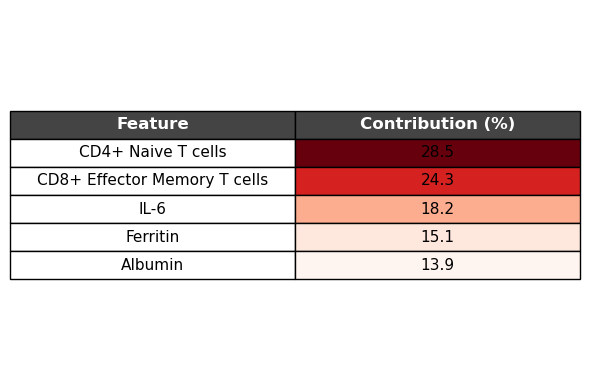

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

# Example data — replace with your own
data = {
    'Feature': [
        'CD4+ Naive T cells', 
        'CD8+ Effector Memory T cells', 
        'IL-6', 
        'Ferritin', 
        'Albumin'
    ],
    'Contribution (%)': [28.5, 24.3, 18.2, 15.1, 13.9]
}

df = pd.DataFrame(data)

# Normalize contribution values for coloring
norm = mcolors.Normalize(vmin=df['Contribution (%)'].min(), vmax=df['Contribution (%)'].max())
cmap = plt.cm.Reds

# Create figure
fig, ax = plt.subplots(figsize=(6, 2 + len(df)*0.4))
ax.axis('off')

# Create table
table_data = []
cell_colors = []

for _, row in df.iterrows():
    table_data.append([row['Feature'], f"{row['Contribution (%)']:.1f}"])
    row_colors = ['white', cmap(norm(row['Contribution (%)']))]
    cell_colors.append(row_colors)

table = ax.table(
    cellText=table_data,
    colLabels=['Feature', 'Contribution (%)'],
    cellColours=cell_colors,
    loc='center',
    cellLoc='center'
)

# Style table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.4)

# Bold headers and set background color
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#444444')  # dark gray for header

plt.tight_layout()
plt.show()


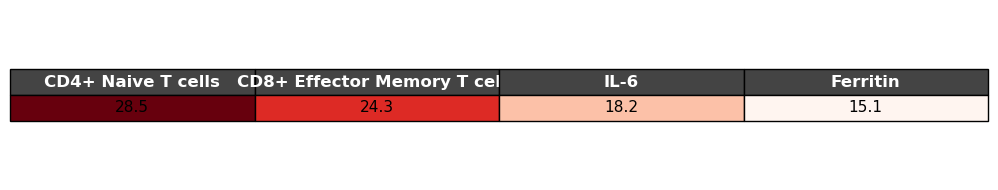

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Your actual features and contributions (replace if needed)
features = [
    "CD4+ Naive T cells",
    "CD8+ Effector Memory T cells",
    "IL-6",
    "Ferritin"
]
contributions = [28.5, 24.3, 18.2, 15.1]  # In %

# Normalize for colormap
norm = mcolors.Normalize(vmin=min(contributions), vmax=max(contributions))
cmap = plt.cm.Reds

# Create horizontal table layout
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# Build table cell text & colors
col_labels = features
cell_text = [[f"{val:.1f}" for val in contributions]]
cell_colours = [[cmap(norm(val)) for val in contributions]]

# Create the table
table = ax.table(
    cellText=cell_text,
    colLabels=col_labels,
    cellColours=cell_colours,
    cellLoc='center',
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.4)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#444444')

plt.tight_layout()
plt.show()


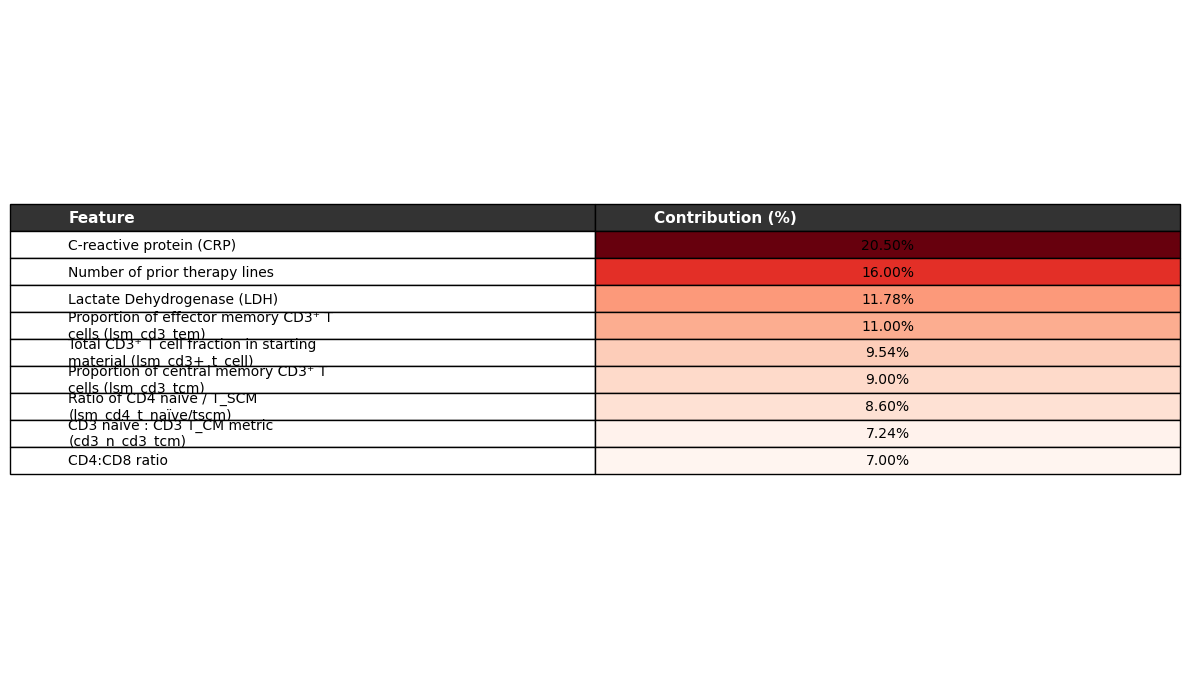

Saved table image to: car_telligence_feature_table_matplotlib.png


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap

# === User data (exact values you supplied) ===
features = [
    "C-reactive protein (CRP)",
    "Number of prior therapy lines",
    "Lactate Dehydrogenase (LDH)",
    "Proportion of effector memory CD3⁺ T cells (lsm_cd3_tem)",
    "Total CD3⁺ T cell fraction in starting material (lsm_cd3+_t_cell)",
    "Proportion of central memory CD3⁺ T cells (lsm_cd3_tcm)",
    "Ratio of CD4 naïve / T_SCM (lsm_cd4_t_naïve/tscm)",
    "CD3 naïve : CD3 T_CM metric (cd3_n_cd3_tcm)",
    "CD4:CD8 ratio"
]

contributions = [20.5, 16.0, 11.78, 11.0, 9.54, 9.0, 8.6, 7.24, 7.0]  # in percent

# === Optional settings ===
wrap_width = 40          # characters at which to wrap long feature names
sort_descending = False  # True to sort rows by contribution descending
output_path = "car_telligence_feature_table_matplotlib.png"
dpi = 300

# === Prepare data (optional sorting) ===
rows = list(zip(features, contributions))
if sort_descending:
    rows = sorted(rows, key=lambda x: x[1], reverse=True)

# Unpack after possible sorting
features_sorted, contributions_sorted = zip(*rows)

# Wrap long labels for nicer table layout
features_wrapped = [textwrap.fill(f, wrap_width) for f in features_sorted]

# === Color mapping ===
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=min(contributions_sorted), vmax=max(contributions_sorted))
mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# === Figure sizing ===
n_rows = len(features_wrapped)
fig_height = 0.6 * n_rows + 1.5
fig_width = 12
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.axis('off')

# Prepare table data and per-row colors (feature cell white, contribution cell colored)
cell_text = []
cell_colours = []
for feat, val in zip(features_wrapped, contributions_sorted):
    cell_text.append([feat, f"{val:.2f}%"])
    cell_colours.append(['white', cmap(norm(val))])

# Create the table (rows stacked vertically)
table = ax.table(
    cellText=cell_text,
    colLabels=['Feature', 'Contribution (%)'],
    cellColours=cell_colours,
    colLoc='left',
    cellLoc='left',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)

# Scale cells: tweak to taste
table.scale(1, 1.3)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header cells
        cell.set_text_props(weight='bold', color='white', ha='left', va='center')
        cell.set_facecolor('#333333')
        cell.set_fontsize(11)
    else:
        # left-align feature text and center contribution text
        if col == 0:
            cell.get_text().set_ha('left')
        else:
            cell.get_text().set_ha('center')

# Optional: add a horizontal colorbar legend below the table
# Uncomment the block below to show colorbar
# cax = fig.add_axes([0.15, 0.06, 0.7, 0.03])  # [left, bottom, width, height]
# cb = plt.colorbar(mapper, cax=cax, orientation='horizontal')
# cb.set_label('Contribution (%)')

plt.tight_layout()
fig.savefig(output_path, dpi=dpi, bbox_inches='tight')
plt.show()

print(f"Saved table image to: {output_path}")


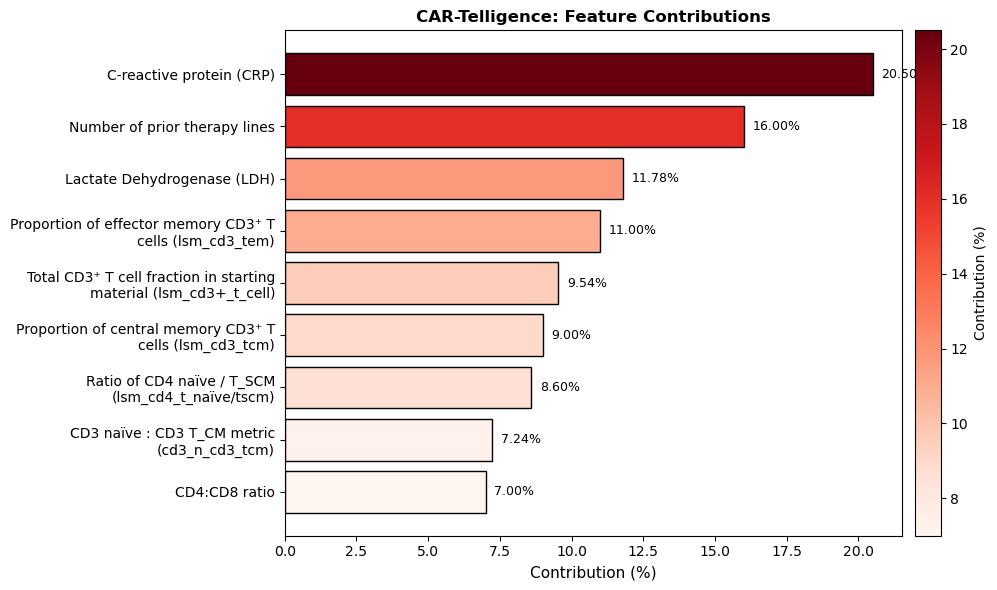

Saved figure to: car_telligence_feature_barh.png


In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap
import numpy as np

# === Your features and contributions (exact values you provided) ===
features = [
    "C-reactive protein (CRP)",
    "Number of prior therapy lines",
    "Lactate Dehydrogenase (LDH)",
    "Proportion of effector memory CD3⁺ T cells (lsm_cd3_tem)",
    "Total CD3⁺ T cell fraction in starting material (lsm_cd3+_t_cell)",
    "Proportion of central memory CD3⁺ T cells (lsm_cd3_tcm)",
    "Ratio of CD4 naïve / T_SCM (lsm_cd4_t_naïve/tscm)",
    "CD3 naïve : CD3 T_CM metric (cd3_n_cd3_tcm)",
    "CD4:CD8 ratio"
]

contributions = [20.5, 16.0, 11.78, 11.0, 9.54, 9.0, 8.6, 7.24, 7.0]  # percent

# === Settings ===
wrap_width = 40           # wrap long labels at this many characters
sort_descending = True    # set True to have largest contribution at top
output_path = "car_telligence_feature_barh.png"
dpi = 300
figsize = (10, 6)

# === Prepare (sort if requested) ===
rows = list(zip(features, contributions))
if sort_descending:
    rows = sorted(rows, key=lambda x: x[1], reverse=True)
features_sorted, contributions_sorted = zip(*rows)

# wrap labels for neat display
features_wrapped = [textwrap.fill(f, wrap_width) for f in features_sorted]

# === Color mapping ===
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=min(contributions_sorted), vmax=max(contributions_sorted))
colors = [cmap(norm(v)) for v in contributions_sorted]

# === Plot ===
fig, ax = plt.subplots(figsize=figsize)
y_pos = np.arange(len(features_wrapped))

ax.barh(y_pos, contributions_sorted, color=colors, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(features_wrapped, fontsize=10)
ax.invert_yaxis()  # largest on top
ax.set_xlabel('Contribution (%)', fontsize=11)
ax.set_title('CAR-Telligence: Feature Contributions', fontsize=12, fontweight='bold')

# add numeric labels to the end of bars
for i, v in enumerate(contributions_sorted):
    ax.text(v + 0.3, i, f"{v:.2f}%", va='center', fontsize=9)

# optional colorbar to show gradient scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label('Contribution (%)')

plt.tight_layout()
fig.savefig(output_path, dpi=dpi, bbox_inches='tight')
plt.show()

print(f"Saved figure to: {output_path}")


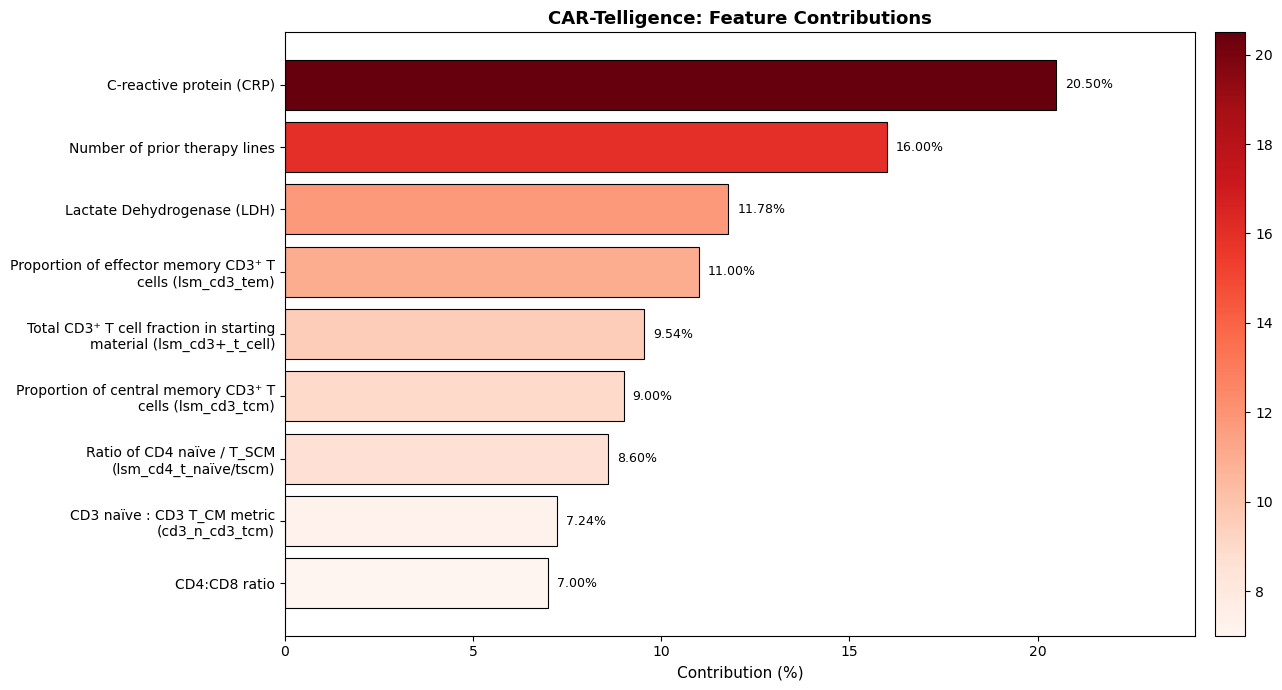

Saved figure to: car_telligence_feature_barh_wide.png


In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap
import numpy as np

# === Your features and contributions (exact values you provided) ===
features = [
    "C-reactive protein (CRP)",
    "Number of prior therapy lines",
    "Lactate Dehydrogenase (LDH)",
    "Proportion of effector memory CD3⁺ T cells (lsm_cd3_tem)",
    "Total CD3⁺ T cell fraction in starting material (lsm_cd3+_t_cell)",
    "Proportion of central memory CD3⁺ T cells (lsm_cd3_tcm)",
    "Ratio of CD4 naïve / T_SCM (lsm_cd4_t_naïve/tscm)",
    "CD3 naïve : CD3 T_CM metric (cd3_n_cd3_tcm)",
    "CD4:CD8 ratio"
]

contributions = [20.5, 16.0, 11.78, 11.0, 9.54, 9.0, 8.6, 7.24, 7.0]  # percent

# === Settings ===
wrap_width = 40           # wrap long labels at this many characters
sort_descending = True    # set True to have largest contribution at top
output_path = "car_telligence_feature_barh_wide.png"
dpi = 300
figsize = (13, 7)         # widened figure

# === Prepare (sort if requested) ===
rows = list(zip(features, contributions))
if sort_descending:
    rows = sorted(rows, key=lambda x: x[1], reverse=True)
features_sorted, contributions_sorted = zip(*rows)

# wrap labels for neat display
features_wrapped = [textwrap.fill(f, wrap_width) for f in features_sorted]

# === Color mapping ===
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=min(contributions_sorted), vmax=max(contributions_sorted))
colors = [cmap(norm(v)) for v in contributions_sorted]

# === Plot ===
fig, ax = plt.subplots(figsize=figsize)
y_pos = np.arange(len(features_wrapped))

bars = ax.barh(y_pos, contributions_sorted, color=colors, edgecolor='black', linewidth=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(features_wrapped, fontsize=10)
ax.invert_yaxis()  # largest on top
ax.set_xlabel('Contribution (%)', fontsize=11)
ax.set_title('CAR-Telligence: Feature Contributions', fontsize=13, fontweight='bold')

# Add numeric labels to the end of bars (positioned just inside or outside depending on space)
max_val = max(contributions_sorted)
x_limit = max_val * 1.18  # give a bit of headroom so labels don't get clipped
ax.set_xlim(0, x_limit)

for i, v in enumerate(contributions_sorted):
    label_x = v + (x_limit * 0.01)  # small offset to the right
    ax.text(label_x, i, f"{v:.2f}%", va='center', fontsize=9)

# colorbar legend (optional)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.06, pad=0.02)
cbar.set_label('Contribution %')

# Adjust layout/margins so table borders and labels are not clipped
plt.subplots_adjust(left=0.30, right=0.95, top=0.90, bottom=0.08)
plt.tight_layout()

fig.savefig(output_path, dpi=dpi, bbox_inches='tight')
plt.show()

print(f"Saved figure to: {output_path}")
